# Laboratorio 3 - Clasificación

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 4 - Clasificar tipo de música

In [1]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 1) Realiza todo el preprocesamiento necesario para poder entrenar el clasificador. (1 punto)

### Carga y Visualización de Datos

In [2]:
#Importamos el CSV
dataset = pd.read_csv('music.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,0.351991,0.079469,2008.581132,2106.617024,4254.215942,0.089267,-153.632309,109.857262,-23.085709,...,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717574,-1.189238,rock
996,rock.00096.wav,0.398653,0.076452,2006.051164,2068.327905,4147.374921,0.097659,-142.424210,116.219780,-32.177074,...,14.065345,-16.394691,4.152589,-4.350760,3.736455,-10.845638,1.875218,-7.459579,-2.802677,rock
997,rock.00097.wav,0.432103,0.081617,2077.190361,1926.989678,4030.767293,0.121824,-125.031311,115.194977,-47.993507,...,10.481961,-17.951916,1.211113,-11.534864,1.844774,-12.847901,3.447425,-12.594178,-2.107002,rock
998,rock.00098.wav,0.362349,0.083888,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,...,7.683081,-10.071786,-0.255098,-5.276486,-2.816289,-4.416438,1.558265,-5.043121,-3.585596,rock


### Limpieza de Datos

In [3]:
#Datos nulos
nulos = pd.DataFrame(dataset.isna().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
filename,0
chroma_stft,0
rmse,0
spectral_centroid,0
spectral_bandwidth,0
rolloff,0
zero_crossing_rate,0
mfcc1,0
mfcc2,0
mfcc3,0


No hay datos nulos por lo que podemos continuar sin problemas a la comprobación de "missing values"

In [4]:
#Datos missing
missing = pd.DataFrame(dataset.isnull().sum(), columns=["Número de missing values"])
missing

,Número de missing values
filename,0
chroma_stft,0
rmse,0
spectral_centroid,0
spectral_bandwidth,0
rolloff,0
zero_crossing_rate,0
mfcc1,0
mfcc2,0
mfcc3,0


No hay 'missing values' por lo que podemos continuar sin problemas al siguiente paso, comprobar repetidos

In [5]:
tamOrig = dataset.shape
print('Tamaño del dataset sin eliminar datos duplicados: ', tamOrig)
dataset = dataset.drop_duplicates()
nuevoTam = dataset.shape
print('Eliminando los duplicados, el dataset queda del tamaño: ', nuevoTam)
if tamOrig == nuevoTam:
    print('No hay datos duplicados')
else:
    print('Se han eliminado,', tamOrig[0] - nuevoTam[0],'datos duplicados')

Tamaño del dataset sin eliminar datos duplicados:  (1000, 28)
Eliminando los duplicados, el dataset queda del tamaño:  (1000, 28)
No hay datos duplicados


Ya hemos terminado el apartado de la limpieza de los datos, pasamos a preprocesarlos

### Preprocesamiento de Datos

In [6]:
dataset.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


Necesitamos normalizar los datos por lo que nos interesa tener todos los valores de tipo numérico. Por lo tanto, la columna del nombre del archivo nos aporta ruido por lo que la eliminamos

In [7]:
#Eliminamos la columna filename
dataset = dataset.drop(columns=['filename'])
#Visualizamos el dataset
dataset.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


Ahora que tenemos ya el dataset completamente limpio procederemos a normalizar los datos (ajustar sus valores entre 0 y 1) y a realizar todos los pasos necesarios para posteriormente aplicarle el clasificador. Vamos a utilizar SVC

In [8]:
#Vamos a utilizar SVC para clasificar los datos, necesitamos normalizar los datos y pasarlos a valor numerico
y = dataset['label'] #Guardamos en Y la clase
X = dataset.loc[:, dataset.columns != 'label'] #En X guardamos todo menos la label que es nuestra clase

#Normalizacion de los datos, ajustamos todo a una misma escala
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [9]:
#Visualizamos los datos normalizados
X

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.362270,0.318150,0.314268,0.422983,0.385681,0.242429,0.738038,0.632423,0.482661,0.614515,...,0.433836,0.633731,0.588101,0.596561,0.414095,0.563895,0.540983,0.422803,0.488203,0.599225
1,0.344051,0.230798,0.248390,0.436755,0.353177,0.135677,0.579882,0.645008,0.674310,0.549400,...,0.494617,0.545327,0.623283,0.546668,0.385686,0.570245,0.574948,0.448532,0.548845,0.579727
2,0.390045,0.433618,0.254250,0.325156,0.289057,0.215701,0.776487,0.729547,0.414766,0.507316,...,0.328306,0.555946,0.459079,0.374346,0.278470,0.622356,0.330836,0.371413,0.454060,0.501595
3,0.473772,0.346073,0.129432,0.267401,0.181141,0.045860,0.593559,0.779075,0.651911,0.458883,...,0.546605,0.563628,0.617437,0.374666,0.490608,0.564925,0.484398,0.461111,0.538834,0.468131
4,0.278183,0.219709,0.327484,0.325614,0.357230,0.315253,0.659483,0.656271,0.370449,0.411440,...,0.329170,0.334653,0.507633,0.163852,0.279969,0.383419,0.409998,0.404005,0.424658,0.233157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.366433,0.188914,0.372273,0.462793,0.442160,0.266924,0.670649,0.572307,0.455869,0.782318,...,0.344641,0.724872,0.375303,0.597513,0.242970,0.599576,0.136625,0.528200,0.355114,0.530984
996,0.461315,0.181231,0.371618,0.448132,0.428682,0.300078,0.689515,0.604998,0.393840,0.682602,...,0.331398,0.769012,0.274595,0.544575,0.441250,0.666271,0.222236,0.506340,0.332758,0.485283
997,0.529333,0.194383,0.390026,0.394012,0.413973,0.395545,0.718791,0.599732,0.285928,0.719919,...,0.263965,0.676758,0.236236,0.448950,0.201003,0.601403,0.152514,0.563815,0.178060,0.504989
998,0.387496,0.200165,0.214449,0.352336,0.285805,0.106787,0.550568,0.643211,0.546825,0.757729,...,0.418961,0.604702,0.430344,0.401284,0.410292,0.441572,0.446112,0.494754,0.405563,0.463107


In [10]:
#Visualizamos la clase objetivo
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

Ahora vamos a dividir nuestro conjunto de datos en entrenamiento y validación

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#Datos de entrenamiento
X_train

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
541,0.277366,0.185883,0.271162,0.256787,0.297066,0.311819,0.565168,0.701436,0.371256,0.808125,...,0.619532,0.619972,0.565613,0.428069,0.382760,0.545188,0.579274,0.253667,0.519933,0.360249
440,0.357479,0.319152,0.481747,0.721854,0.571121,0.315351,0.617431,0.504929,0.917679,0.328375,...,0.595896,0.604808,0.828386,0.405940,0.605963,0.555664,0.395517,0.238186,0.465259,0.429194
482,0.674622,0.247148,0.445172,0.491669,0.513530,0.361590,0.722603,0.496160,0.413185,0.658963,...,0.465251,0.809612,0.513491,0.678622,0.561830,0.861028,0.643992,0.498957,0.572222,0.610368
422,0.544676,0.428621,0.376687,0.526433,0.486238,0.212142,0.759865,0.574104,0.620536,0.578433,...,0.413754,0.700241,0.444335,0.690496,0.349356,0.640820,0.443182,0.609132,0.433360,0.485748
778,0.575276,0.555445,0.660950,0.793513,0.740358,0.478098,0.857277,0.330518,0.645855,0.430688,...,0.511915,0.484656,0.647837,0.295012,0.575871,0.488653,0.534970,0.436645,0.535522,0.536696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.182409,0.071183,0.207761,0.260882,0.250887,0.202358,0.431513,0.699104,0.460225,0.598332,...,0.410756,0.511487,0.718542,0.576628,0.768760,0.616502,0.536640,0.330926,0.561573,0.655238
270,0.393025,0.354046,0.353268,0.410531,0.416247,0.288664,0.762107,0.611889,0.409533,0.599305,...,0.424584,0.623420,0.509787,0.423693,0.409225,0.594500,0.343721,0.456653,0.513469,0.396954
860,0.258642,0.052362,0.472457,0.537172,0.510057,0.382540,0.421891,0.404623,0.520697,0.583884,...,0.431195,0.314166,0.614360,0.174421,0.504963,0.564139,0.287668,0.340749,0.391850,0.326575
435,0.726036,0.473865,0.583617,0.740024,0.686412,0.322361,0.759390,0.338122,0.699026,0.455033,...,0.584263,0.580240,0.773550,0.510019,0.645263,0.694244,0.517485,0.636285,0.641017,0.670215


In [13]:
#Datos de validacion
X_test

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
521,0.530802,0.108743,0.606808,0.582964,0.645336,0.630898,0.635237,0.397853,0.526079,0.717661,...,0.313375,0.741869,0.484768,0.670355,0.387113,0.865008,0.390878,0.523302,0.456334,0.635786
737,0.569115,0.600173,0.689993,0.787109,0.750531,0.565420,0.937361,0.339231,0.596283,0.293485,...,0.688937,0.452042,0.760616,0.486049,0.634528,0.517401,0.523790,0.379211,0.539061,0.449949
740,0.244950,0.494094,0.360303,0.546540,0.387539,0.292778,0.799809,0.589923,0.570930,0.389291,...,0.534155,0.516149,0.734900,0.314733,0.737813,0.655327,0.581012,0.417405,0.576711,0.507920
660,0.749703,0.306808,0.451795,0.447519,0.487885,0.465548,0.831296,0.551553,0.313841,0.776255,...,0.272018,0.647887,0.301095,0.459349,0.386948,0.608349,0.362590,0.591751,0.454986,0.614727
411,0.553496,0.505508,0.394708,0.514163,0.483392,0.286363,0.804392,0.545315,0.556159,0.687995,...,0.288065,0.583907,0.300977,0.564768,0.215785,0.700737,0.502176,0.686269,0.382639,0.457638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0.508936,0.569428,0.511093,0.708395,0.622489,0.292434,0.818070,0.392734,0.754212,0.583656,...,0.582356,0.444398,0.619048,0.338340,0.442238,0.386684,0.421359,0.280907,0.366506,0.422595
935,0.580407,0.302744,0.335697,0.583654,0.444275,0.139406,0.720529,0.570512,0.653540,0.519454,...,0.829622,0.485763,0.765473,0.433306,0.645768,0.514894,0.598721,0.400845,0.389680,0.540595
428,0.412356,0.380120,0.570547,0.690186,0.630397,0.366979,0.789251,0.355777,0.621783,0.486922,...,0.590987,0.516154,0.726038,0.442813,0.666346,0.644696,0.319229,0.498899,0.507602,0.471919
7,0.276823,0.322124,0.228185,0.260139,0.278313,0.156973,0.627284,0.708991,0.431507,0.590757,...,0.431851,0.227852,0.591127,0.147837,0.287126,0.249268,0.232222,0.043412,0.416089,0.319979


In [14]:
#Volvemos a separar los datos de validacion 95-5 sobre X_test e y_test
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.95, random_state=42)

### 2) Crea un clasificador e indica su error. Úsalo para saber a qué tipo corresponden al menos 5 audios/canciones que no hayas usado para entrenar el modelo. (1 punto) 

In [15]:
#Definimos el modelo
#Support Vector Machine
svc = SVC(decision_function_shape="ovo")

#Ajustamos al modelo los datos y calculamos la precision
svc.fit(X_train, y_train)
prediccion = svc.predict(X_test)

In [16]:
#Matriz de confusión
matrizConf = confusion_matrix(y_test,prediccion)
#Sacamos la matriz de confusión
print(matrizConf)

[[18  0  3  0  0  2  6  0  0  6]
 [ 0 17  0  0  0  1  0  0  0  0]
 [ 5  0 22  2  2  2  0  1  1  2]
 [ 1  0  0 17  7  0  0  1  2  5]
 [ 0  0  0  1 10  0  1  3  5  1]
 [ 1  6  1  2  0 19  0  0  0  1]
 [ 0  0  0  1  0  0 27  0  0  1]
 [ 0  0  1  0  0  0  0 20  1  0]
 [ 0  0  3  2  5  1  0  1 12  4]
 [ 5  0  4  4  1  1  5  1  3  8]]


In [17]:
#Precision del modelo
precision = round(accuracy_score(y_test, prediccion), 3)
print('Precisión SVC:', precision*100, '%')
print('Error SVC:', 100 - (precision*100), '%')

Precisión SVC: 59.599999999999994 %
Error SVC: 40.400000000000006 %


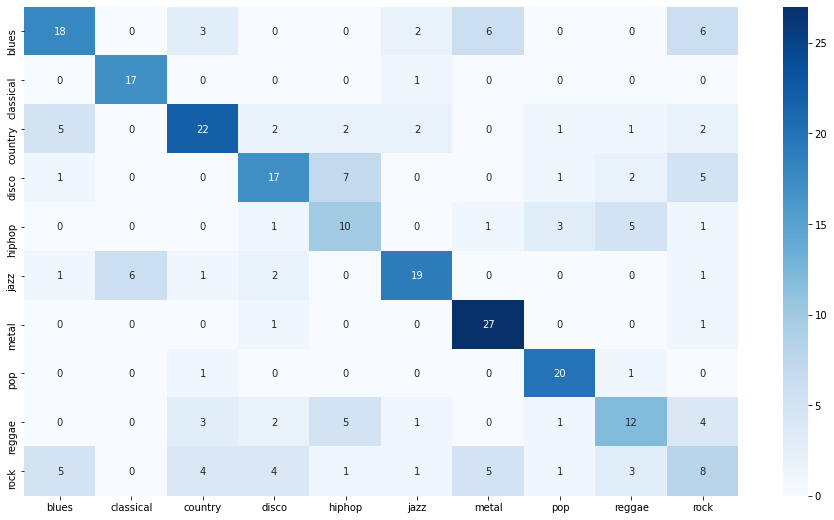

In [18]:
plt.figure(figsize = (16, 9))
sns.heatmap(matrizConf, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
            yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

In [19]:
#Comprobando fiabilidad del modelo
prediccion = svc.predict(X_test)
aciertos = 0;
errores = 0;
totales = len(prediccion)
i = 0
for valorPredecido in prediccion:
    print('Se ha predecido que la canción es:\033[1m', valorPredecido, '\033[0m Deberia ser:\033[1m', y_test.iloc[i], '\033[0m')
    if valorPredecido == y_test.iloc[i]:
        print('\033[92mACIERTO!\033[0m')
        aciertos = aciertos+1
    else:
        print('\033[91mERROR\033[0m')
        errores = errores+1
    i = i+1

Se ha predecido que la canción es: jazz  Deberia ser: jazz 
ACIERTO!
Se ha predecido que la canción es: pop  Deberia ser: pop 
ACIERTO!
Se ha predecido que la canción es: disco  Deberia ser: rock 
ERROR
Se ha predecido que la canción es: classical  Deberia ser: classical 
ACIERTO!
Se ha predecido que la canción es: jazz  Deberia ser: jazz 
ACIERTO!
Se ha predecido que la canción es: classical  Deberia ser: jazz 
ERROR
Se ha predecido que la canción es: rock  Deberia ser: disco 
ERROR
Se ha predecido que la canción es: metal  Deberia ser: rock 
ERROR
Se ha predecido que la canción es: metal  Deberia ser: metal 
ACIERTO!
Se ha predecido que la canción es: hiphop  Deberia ser: disco 
ERROR
Se ha predecido que la canción es: jazz  Deberia ser: rock 
ERROR
Se ha predecido que la canción es: jazz  Deberia ser: blues 
ERROR
Se ha predecido que la canción es: blues  Deberia ser: rock 
ERROR
Se ha predecido que la canción es: country  Deberia ser: country 
ACIERTO!
Se ha predecido que la canció

In [20]:
print('Se han predecido correctamente',aciertos,'canciones')
print('Se han predecido erróneamente',errores,'canciones')
porcentajeAcierto = (aciertos/totales)*100
porcentajeError = (errores/totales)*100
print('El porcentaje de acierto ha sido del:',porcentajeAcierto,'%')
print('El porcentaje de error ha sido del:',porcentajeError,'%')

Se han predecido correctamente 170 canciones
Se han predecido erróneamente 115 canciones
El porcentaje de acierto ha sido del: 59.64912280701754 %
El porcentaje de error ha sido del: 40.35087719298245 %


### Comprobando el modelo con datos que no han sido usados para entrenar ni validar

In [21]:
#Predecir los valores para el conjunto de datos en X_val y compararlos con y_val
predicciones = svc.predict(X_val)

#Comprobando fiabilidad del modelo
aciertos = 0;
errores = 0;
totales = len(predicciones)
i = 0
for valorPredecido in predicciones:
    #Pasamos las clases a sus valores nominales
    print('Se ha predecido que la cancion es:\033[1m', valorPredecido, '\033[0m Deberia ser:\033[1m', y_test.iloc[i], '\033[0m')
    if valorPredecido == y_test.iloc[i]:
        print('\033[92mACIERTO!\033[0m')
        aciertos = aciertos+1
    else:
        print('\033[91mERROR\033[0m')
        errores = errores+1
    i = i+1

Se ha predecido que la cancion es: metal  Deberia ser: jazz 
ERROR
Se ha predecido que la cancion es: disco  Deberia ser: pop 
ERROR
Se ha predecido que la cancion es: jazz  Deberia ser: rock 
ERROR
Se ha predecido que la cancion es: classical  Deberia ser: classical 
ACIERTO!
Se ha predecido que la cancion es: reggae  Deberia ser: jazz 
ERROR
Se ha predecido que la cancion es: reggae  Deberia ser: jazz 
ERROR
Se ha predecido que la cancion es: metal  Deberia ser: disco 
ERROR
Se ha predecido que la cancion es: hiphop  Deberia ser: rock 
ERROR
Se ha predecido que la cancion es: classical  Deberia ser: metal 
ERROR
Se ha predecido que la cancion es: jazz  Deberia ser: disco 
ERROR
Se ha predecido que la cancion es: rock  Deberia ser: rock 
ACIERTO!
Se ha predecido que la cancion es: disco  Deberia ser: blues 
ERROR
Se ha predecido que la cancion es: country  Deberia ser: rock 
ERROR
Se ha predecido que la cancion es: hiphop  Deberia ser: country 
ERROR
Se ha predecido que la cancion es:

In [25]:
print('Se han predecido correctamente',aciertos,'canciones')
print('Se han predecido erróneamente',errores,'canciones\n')
porcentajeAcierto = (aciertos/totales)*100
porcentajeError = (errores/totales)*100
print('\033[92mEl porcentaje de acierto ha sido del:',porcentajeAcierto,'%\033[0m')
print('\033[91mEl porcentaje de error ha sido del:',porcentajeError,'%\033[0m')

Se han predecido correctamente 2 canciones
Se han predecido erróneamente 13 canciones

El porcentaje de acierto ha sido del: 13.333333333333334 %
El porcentaje de error ha sido del: 86.66666666666667 %


## Conclusión

Gracias al Support Vector Machine hemos podido podido analizar los datos y reconocer algunos patrones y clasificando en función del tipo de música. Si bien es cierto que nos faltarían más datos de entrenamiento para obtener una mayor precisión en la clasificación y la generación de normas, sobretodo en aquellos tipos de música que tienen frecuencias parecidas o poco claras como el blues o la música disco como se puede apreciar en nuestra matriz de confusión, y con ello poder bajar el porcentaje de error.